# Proyecto Individual 3 -- Analisis de Datos --

### Análisis exploratorio de datos (EDA)

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

# Coursera

Coursera Courses

In [2]:
df1 = pd.read_csv('PI_3/Moocs/Coursera_courses.csv')
df1_copy = df1.copy()

df1.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [3]:
df1_copy.tail()

,name,institution,course_url,course_id
618,Accounting Data Analytics with Python,University of Illinois at Urbana-Champaign,https://www.coursera.org/learn/accounting-data...,accounting-data-analytics-python
619,Introduction to Molecular Spectroscopy,University of Manchester,https://www.coursera.org/learn/spectroscopy,spectroscopy
620,Managing as a Coach,"University of California, Davis",https://www.coursera.org/learn/managing-as-a-c...,managing-as-a-coach
621,The fundamentals of hotel distribution,ESSEC Business School,https://www.coursera.org/learn/hotel-distribution,hotel-distribution
622,A Crash Course in Data Science,Johns Hopkins University,https://www.coursera.org/learn/data-science-co...,data-science-course


In [4]:
df1_copy.sample(6)

,name,institution,course_url,course_id
549,"Sleep: Neurobiology, Medicine, and Society",University of Michigan,https://www.coursera.org/learn/sleep,sleep
112,Object-Oriented Data Structures in C++,University of Illinois at Urbana-Champaign,https://www.coursera.org/learn/cs-fundamentals-1,cs-fundamentals-1
83,Introduction to Systematic Review and Meta-Ana...,Johns Hopkins University,https://www.coursera.org/learn/systematic-review,systematic-review
571,Accounting Analytics,University of Pennsylvania,https://www.coursera.org/learn/accounting-anal...,accounting-analytics
97,Financial Engineering and Risk Management Part I,Columbia University,https://www.coursera.org/learn/financial-engin...,financial-engineering-1
525,Introduction to Clinical Data,Stanford University,https://www.coursera.org/learn/introduction-cl...,introduction-clinical-data


In [5]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [6]:
df1_copy.describe()

,name,institution,course_url,course_id
count,623,623,623,623
unique,622,134,623,623
top,Introduction to Psychology,University of Pennsylvania,https://www.coursera.org/learn/machine-learning,machine-learning
freq,2,43,1,1


In [7]:
# cambio los id en string por nuevos en formato int 
lista_values = list(df1['course_id'].unique())

count = 0

for i in lista_values:
    count+=1
    for g in df1_copy['course_id']:
        if g == i:
            df1_copy['course_id'].replace(g, count, inplace=True)

# dropeo columnas

df1_copy.drop(columns='course_url', inplace=True)

df1_copy.head()

,name,institution,course_id
0,Machine Learning,Stanford University,1
1,Indigenous Canada,University of Alberta,2
2,The Science of Well-Being,Yale University,3
3,Technical Support Fundamentals,Google,4
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,5


Coursera reviews

In [8]:
df2 = pd.read_csv('PI_3/Moocs/Coursera_reviews.csv')
df2_copy = df2.copy()
df2_copy.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [9]:
df2_copy.tail()

,reviews,reviewers,date_reviews,rating,course_id
1454706,g,By Brijesh K,"Aug 25, 2020",5,computer-networking
1454707,.,By Vasavi V M,"Jul 02, 2020",5,computer-networking
1454708,.,By Drishti D,"Jun 20, 2020",5,computer-networking
1454709,.,By FAUSTINE F K,"Jun 07, 2020",5,computer-networking
1454710,G,By Reza S,"Aug 12, 2018",5,computer-networking


In [10]:
df2_copy.sample(6)

,reviews,reviewers,date_reviews,rating,course_id
1379063,An excellent course with a strong foundation o...,By Sathyanarayanan J,"Oct 26, 2019",5,machine-learning
1276230,Good Teaching,By Y. S g,"Jul 12, 2020",4,big-data-introduction
268300,quality of the content and explanation by inst...,By Sandeep K S,"Mar 04, 2019",4,gcp-fundamentals
1194363,Good experience,By Dasari y s g p,"May 19, 2020",5,moralities
1104460,"Un curso fantastico, recomendado para cualquie...",By Camilo B B,"Aug 18, 2020",5,how-things-work
1418384,"I found this course very interesting, and info...",By Joshua W,"Jul 19, 2020",4,technical-support-fundamentals


In [11]:
df2_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


In [12]:
df2_copy.describe()

,rating
count,1.454711e+06
mean,4.696649e+00
std,6.983271e-01
min,1.000000e+00
25%,5.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [13]:
# modifico los id para que queden igual al df1

count = 0
for i in lista_values:
    count+=1
    for g in df2_copy['course_id']:
        if g == i:
            df2_copy['course_id'].replace(g, count, inplace=True)

df2_copy.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,5
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,5
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,5
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,5
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,5


In [14]:
df2_copy.isnull().sum()

reviews         140
reviewers         0
date_reviews      0
rating            0
course_id         0
dtype: int64

In [15]:
# agrego columna nueva al df1 con la cantidad de reviews que tiene cada curso

lista_reviews = []
for i in df1_copy['course_id']:
    filtrado = df2_copy[df2_copy['course_id'] == i]
    counts = filtrado.shape[0]  
    lista_reviews.append(counts)

df1_copy['num_reviews']=lista_reviews

# agrego columna nueva al df1 con el promedio de raiting que tiene cada curso

lista_course_id = [x for x in df1_copy['course_id']]
promedio_rating = []

for g in lista_course_id:
    filtro = df2_copy[df2_copy['course_id'] == g]    
    value = filtro['rating'].mean()
    promedio_rating.append(value)

df1_copy['promedio_rating']=promedio_rating

In [16]:
# valores nulos
df1_copy.isnull().sum()

# identifico 19 valores nulos, que significan que son cursos sin reviews

name                0
institution         0
course_id           0
num_reviews         0
promedio_rating    19
dtype: int64

In [17]:
# como no me interesan los cursos sin reviews los dropeo

df1_copy.dropna(inplace=True)

df1_copy.head()

,name,institution,course_id,num_reviews,promedio_rating
0,Machine Learning,Stanford University,1,35895,4.750522
1,Indigenous Canada,University of Alberta,2,3702,4.813614
2,The Science of Well-Being,Yale University,3,20085,4.928404
3,Technical Support Fundamentals,Google,4,35319,4.776183
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,5,87,4.931034


In [18]:
df1_copy.to_csv('coursera.csv', index=False)

df1_eda = df1_copy.drop(columns='course_id')

Scatter plot

<Figure size 1600x1200 with 0 Axes>

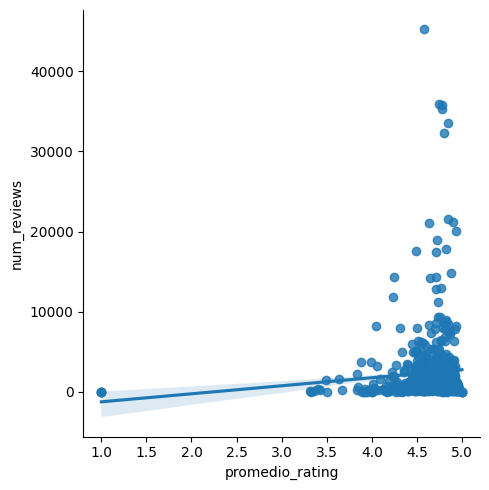

In [19]:
plt.figure(figsize=(16,12))
sns.lmplot(x='promedio_rating',y='num_reviews',data=df1_eda)

Box plot

<AxesSubplot: >

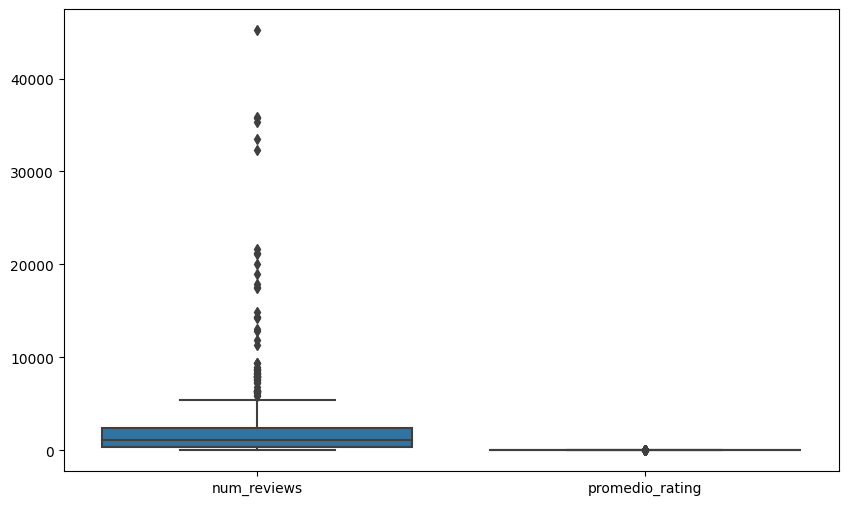

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df1_eda)

In [22]:
# busco la correlacion de las variables para verificar que no tenga columnas redundantes

teju = df1_eda.corr()
teju

/tmp/ipykernel_5721/488400081.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  teju = df1_eda.corr()


,num_reviews,promedio_rating
num_reviews,1.000000,0.086729
promedio_rating,0.086729,1.000000


<AxesSubplot: >

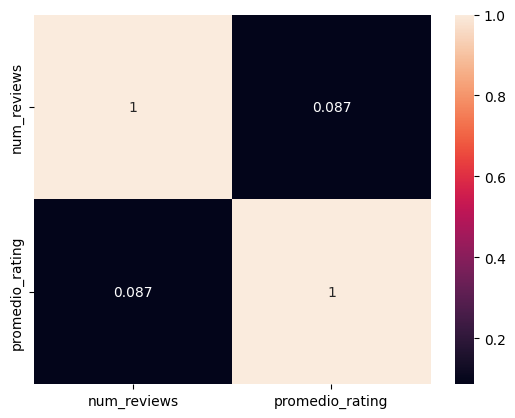

In [23]:
sns.heatmap(teju,annot=True)

Joint plot

<Figure size 1600x1200 with 0 Axes>

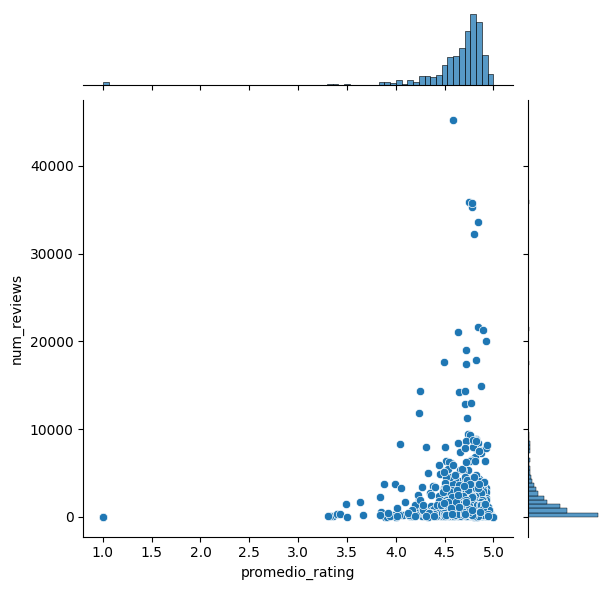

In [24]:

plt.figure(figsize=(16,12))
sns.jointplot(x='promedio_rating',y='num_reviews',data=df1_eda)

Density plot


<AxesSubplot: xlabel='promedio_rating', ylabel='num_reviews'>

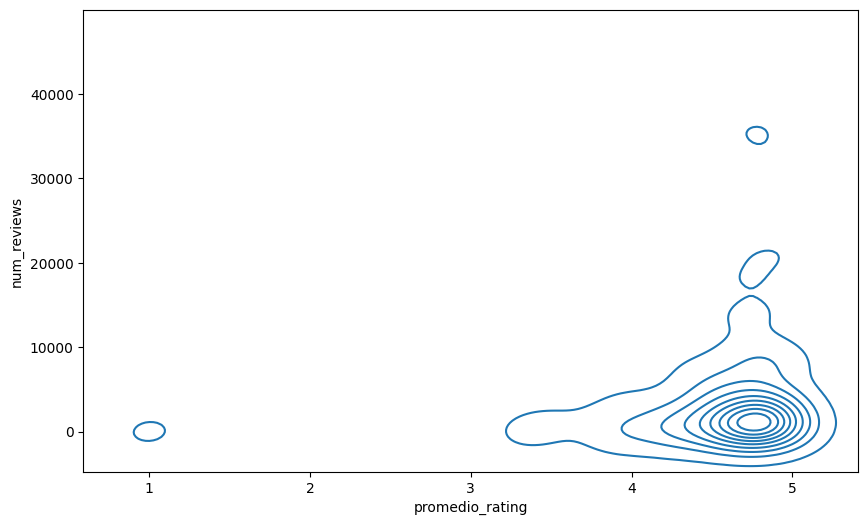

In [25]:

plt.figure(figsize=(10,6))
sns.kdeplot(x='promedio_rating',y='num_reviews',data=df1_eda)

Distribution plot

/tmp/ipykernel_5721/3001726307.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_eda.promedio_rating)


<AxesSubplot: xlabel='promedio_rating', ylabel='Density'>

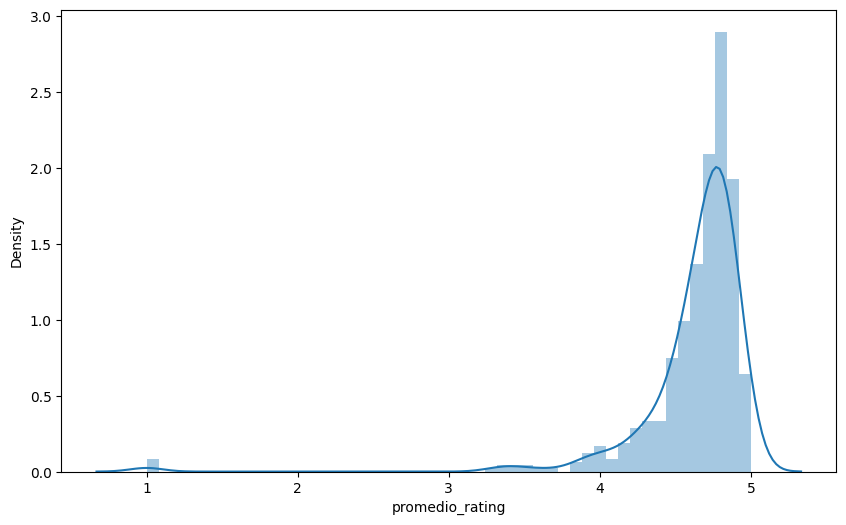

In [26]:
plt.figure(figsize=(10,6)) # Figure Size
sns.distplot(df1_eda.promedio_rating)

# Edx

In [27]:
df3 = pd.read_csv('PI_3/Moocs/edx_courses.csv')
df3.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [28]:
df3.tail()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",NaN,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10 Weeks,FREE-Add a Verified Certificate for $25 USD,The high rates of crime and violence are two o...,NaN,https://www.edx.org/course/leaders-in-citizen-...
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,NaN,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12 Weeks,FREE-Add a Verified Certificate for $139 USD,Are you an original designer? Or a DIY fancier...,NaN,https://www.edx.org/course/pattern-studying-an...
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,"11,246",Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,FREE-Add a Verified Certificate for $139 USD,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...,https://www.edx.org/course/computational-neuro...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,"8,775",Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1 Weeks,FREE-Add a Verified Certificate for $25 USD,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...,https://www.edx.org/course/cities-and-the-chal...
974,MathTrackX: Special Functions,"Understand trigonometric, exponential and loga...",NaN,Self-paced on your time,University of Adelaide,Dr David Butler,Introductory,Math,English,English,3–6 hours per week,4 Weeks,FREE-Add a Verified Certificate for $79 USD,This course is part two of the MathTrackX XSer...,NaN,https://www.edx.org/course/mathtrackx-special-...


In [29]:
df3.sample(6)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
49,Leaders of Learning,Explore and understand your own theories of le...,"231,131",Self-paced on your time,Harvard University,Richard Elmore,Introductory,Communication,English,"English, Español",2–4 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD,All of us carry explicit or implicit theories ...,NaN,https://www.edx.org/course/leaders-of-learning
627,"Feeding a Hungry Planet: Agriculture, Nutritio...",How do we create a healthy and sustainable die...,"10,488",Self-paced on your time,SDG Academy,Achim Dobermann-Ken Giller-Jessica Fanzo-Upman...,Intermediate,Environmental Studies,English,"English, Русский",3–5 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,Agriculture is more than waving fields of whea...,Module 1: The global challenges around food Mo...,https://www.edx.org/course/feeding-a-hungry-pl...
730,China’s First Empires and the Rise of Buddhism,"Learn about the Qin and Han dynasties, and how...","46,053",Self-paced on your time,Harvard University,Peter K. Bol-William C. Kirby,Introductory,History,English,"English, 中文",1–3 hours per week,15 Weeks,FREE-Add a Verified Certificate for $139 USD,"This course, the second in a collection on Chi...",NaN,https://www.edx.org/course/chinas-first-empire...
520,Fighting for Equality: 1950–2018,This course is part of a XSeries Program,"9,274",Self-paced on your time,Columbia University,Alice Kessler-Harris-Nick Juravich-Columbia Un...,Intermediate,History,English,English,2–3 hours per week,10 Weeks,FREE-Add a Verified Certificate for $50 USD,NaN,NaN,https://www.edx.org/course/fighting-for-equali...
950,Inspiring and Motivating Arts and Culture Teams,Learn critical leadership skills that enable y...,"10,817",Self-paced on your time,The University of Michigan,Scott DeRue-Maxim Sytch-National Arts Strategi...,Introductory,Business & Management,English,English,3–5 hours per week,5 Weeks,FREE-Add a Verified Certificate for $49 USD,Offered by the Ross School of Business at the ...,Weeks 1 & 2: Becoming a Visionary Leader\nEver...,https://www.edx.org/course/inspiring-and-motiv...
120,Python: aprender a programar,Aprende a programar con Python desde cero. Com...,"21,613",Self-paced on your time,Universitat Politècnica de Valencia,Leonardo Salom Muñoz,Introductory,Computer Science,Español,Español,3–4 hours per week,8 Weeks,FREE-Add a Verified Certificate for $49 USD,Este curso empieza desde 0 para aprender a pro...,Módulo 1. En el módulo reflexionamos sobre las...,https://www.edx.org/course/python-aprender-a-p...


In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [31]:
df3.describe()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
count,975,922,855,975,975,972,975,975,975,972,975,975,975,935,417,975
unique,972,887,849,2,111,775,3,31,9,33,53,18,47,932,412,974
top,Introduction to Probability,This course is part of a MicroMasters® Program,"97,291",Self-paced on your time,Harvard University,Rafael Irizarry,Introductory,Computer Science,English,English,2–4 hours per week,4 Weeks,FREE-Add a Verified Certificate for $49 USD,"About the Database Series of Courses""Databases...",Course Outline:,https://www.edx.org/course/introduction-to-pro...
freq,2,15,2,917,104,9,621,166,777,713,108,194,270,3,3,2


In [32]:
# copia y valores nulos

df3_copy = df3.copy()

# drop de columnas que no me interesan

df3_copy.drop(columns=['summary','course_type','instructors','course_effort','course_length','course_description','course_syllabus','course_url'],inplace=True)

In [33]:
df3_copy.isnull().sum()

title            0
n_enrolled     120
institution      0
Level            0
subject          0
language         0
subtitles        3
price            0
dtype: int64

In [34]:
# filtro solamente los precios de los cursos certificados

import re

def extract_numbers_from_string(string):
    return [int(item) for item in re.findall(r'\b\d+\b', string)]

lista_precios=[]
for i in df3_copy['price']:
    price_i = extract_numbers_from_string(i)
    lista_precios.append(price_i[0])

df3_copy['price']=lista_precios

In [35]:
# la columna que me interesa es n_enrolled, debido a que es la unica que queda con valores vacios, dropeo todos los que tenga

df3_copy.dropna(inplace=True)

In [36]:
# verifico que tipo de values tiene la columna n_enrolled

print(type(df3_copy['n_enrolled'][0]))

<class 'str'>


In [37]:
# le quito las comas que separan los numeros

str_n_enrolled = [x for x in df3_copy['n_enrolled']]

for index,cadena in enumerate(str_n_enrolled):
    str_n_enrolled[index] = str(cadena).replace(',','')


# cambio a formato int toda la columna

int_n_enrolled = [int(x) for x in str_n_enrolled]

df3_copy['n_enrolled']=int_n_enrolled

In [38]:
df3_copy.head()

,title,n_enrolled,institution,Level,subject,language,subtitles,price
0,How to Learn Online,124980,edX,Introductory,Education & Teacher Training,English,English,49
1,Programming for Everybody (Getting Started wit...,293864,The University of Michigan,Introductory,Computer Science,English,English,49
2,CS50's Introduction to Computer Science,2442271,Harvard University,Introductory,Computer Science,English,English,90
3,The Analytics Edge,129555,Massachusetts Institute of Technology,Intermediate,Data Analysis & Statistics,English,English,199
4,Marketing Analytics: Marketing Measurement Str...,81140,"University of California, Berkeley",Introductory,Computer Science,English,English,249


In [39]:
df3_copy.to_csv('edx.csv', index=False)

Scatter plot

<Figure size 1600x1200 with 0 Axes>

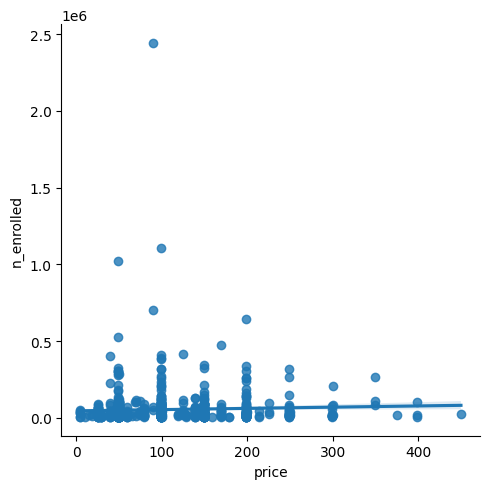

In [40]:
plt.figure(figsize=(16,12))
sns.lmplot(x='price',y='n_enrolled',data=df3_copy)

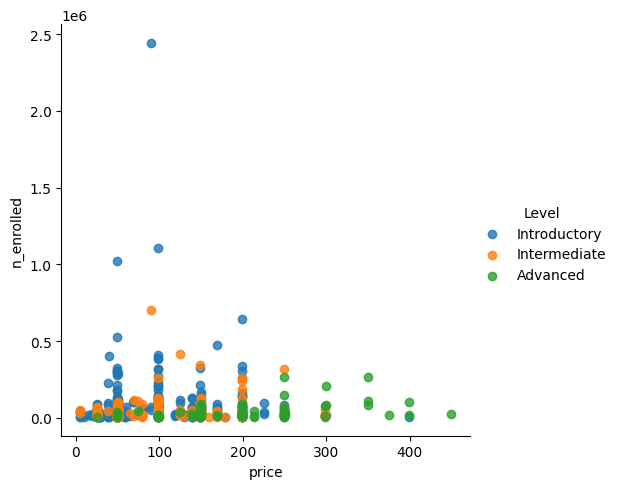

In [41]:
sns.lmplot(x='price',y='n_enrolled',data=df3_copy,fit_reg=False,hue='Level')

Countplot

<AxesSubplot: xlabel='Level', ylabel='count'>

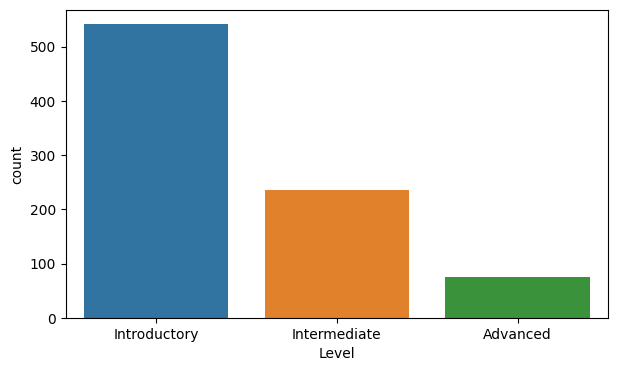

In [42]:
fig_dims = (7,4)
fig,ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Level',data = df3_copy,ax=ax)

Boxplot

<AxesSubplot: >

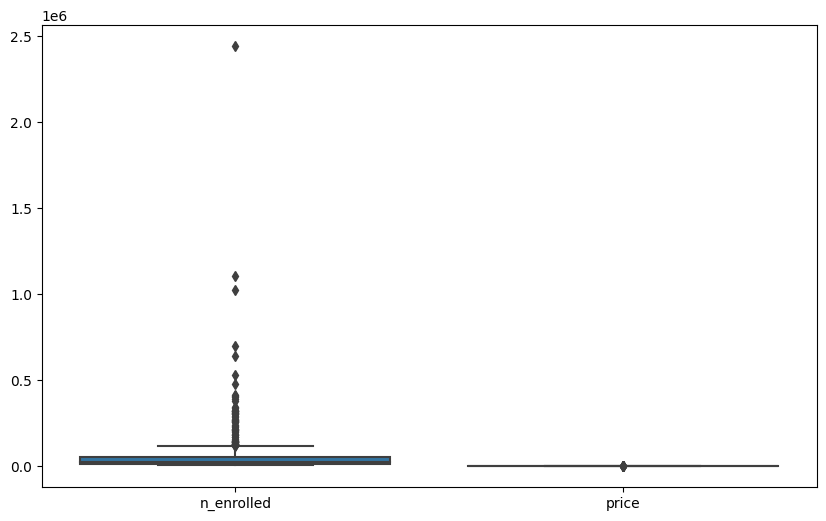

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df3_copy)

Pie chart

/home/ezequiell/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ezequiell/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ezequiell/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ezequiell/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ezequiell/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from c

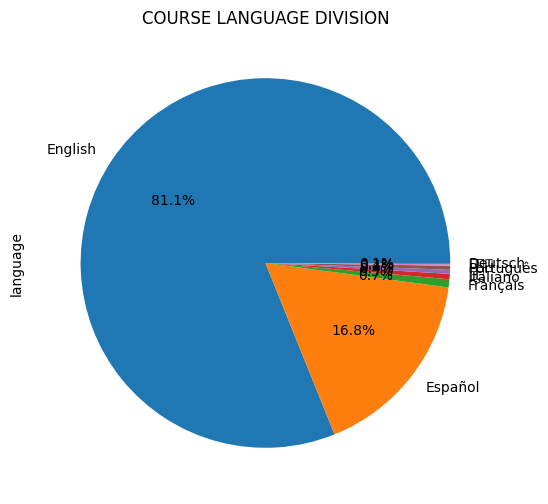

In [44]:
ax= df3_copy['language'].value_counts(ascending=False).plot.pie(autopct='%1.1f%%',
            figsize=(10, 6))
plt.title('COURSE LANGUAGE DIVISION') 
plt.show()

In [45]:
df3_copy.shape

(852, 8)

In [46]:
teju = df3_copy.corr()
teju

/tmp/ipykernel_5721/3053651436.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  teju = df3_copy.corr()


,n_enrolled,price
n_enrolled,1.000000,0.047164
price,0.047164,1.000000


<AxesSubplot: >

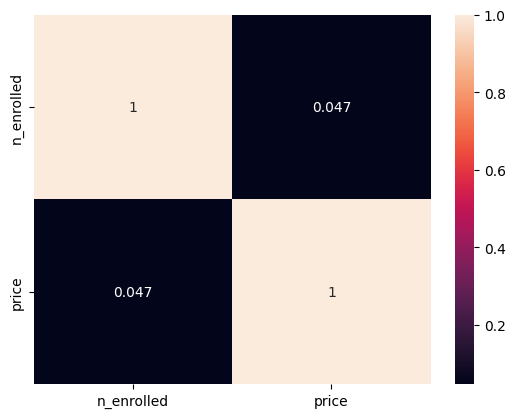

In [47]:
sns.heatmap(teju,annot=True)

Joint plot

<Figure size 1000x600 with 0 Axes>

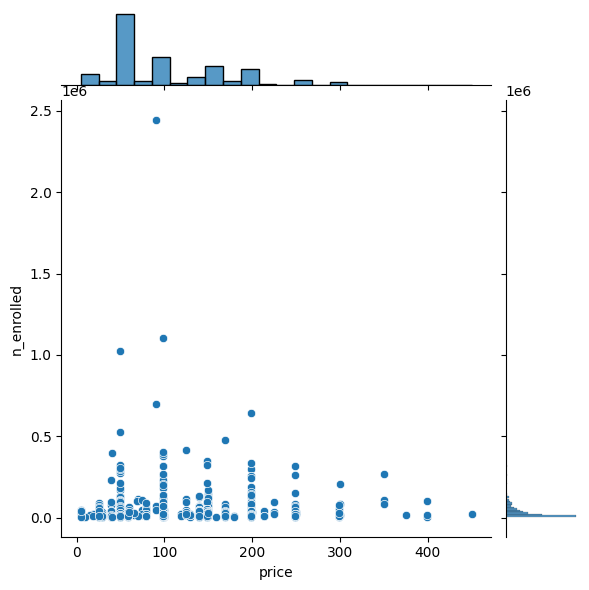

In [48]:
plt.figure(figsize=(10,6))
sns.jointplot(x='price',y='n_enrolled',data=df3_copy)

Distribution plot

/tmp/ipykernel_5721/3737021099.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_copy.price)


<AxesSubplot: xlabel='price', ylabel='Density'>

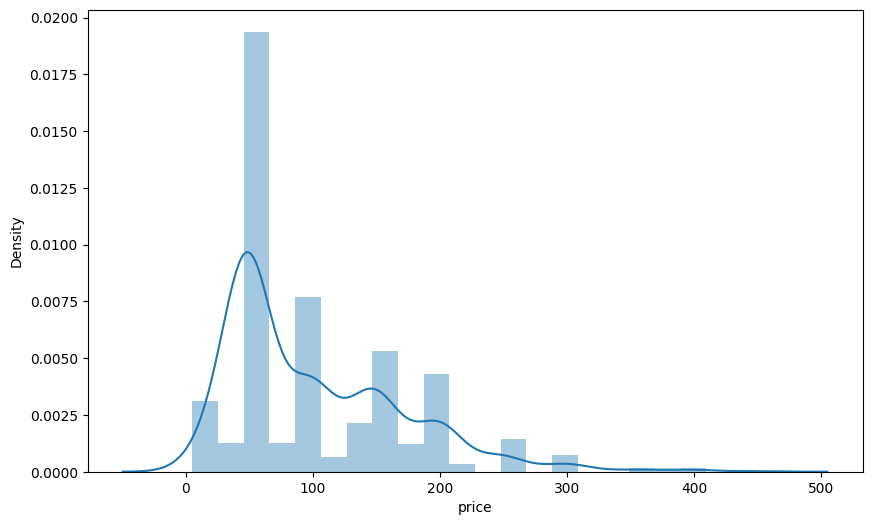

In [49]:
plt.figure(figsize=(10,6))
sns.distplot(df3_copy.price)

# Udemy

In [50]:
df4 = pd.read_csv('PI_3/Moocs/udemy_courses.csv')
df4.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [51]:
df4.tail()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,36,20,Beginner Level,2.0,2014-09-28T19:51:11Z,Web Development


In [52]:
df4.sample(6)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3396,934570,Wordpress Backup & Restore,https://www.udemy.com/wordpress-backup-restore/,True,95,478,37,18,All Levels,1.5,2016-09-15T17:20:21Z,Web Development
3589,399640,Intro To HTML & CSS: Web Development For Begin...,https://www.udemy.com/intro-to-html-and-css-ba...,True,20,6008,203,35,Beginner Level,4.0,2015-01-24T18:32:40Z,Web Development
1735,1083784,Crie seu Cartão de Visita no CorelDRAW X8,https://www.udemy.com/crie-seu-cartao-de-visit...,True,20,28,3,38,Beginner Level,4.0,2017-03-02T17:04:04Z,Graphic Design
94,474928,Intermediate Options trading concepts for Stoc...,https://www.udemy.com/intermediate-options-tra...,True,40,2000,30,9,All Levels,1.0,2015-04-13T20:28:04Z,Business Finance
2868,1071060,Django by Example,https://www.udemy.com/django-by-example/,True,125,170,21,78,Expert Level,9.0,2017-01-13T02:50:03Z,Web Development
842,1101382,Binary Options Masterclass,https://www.udemy.com/binary-options-masterclass/,True,200,70,11,16,All Levels,2.0,2017-02-13T16:37:57Z,Business Finance


In [53]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [54]:
df4.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [55]:
# copia
df4_copy = df4.copy()

# dropeo columnas

df4_copy.drop(columns=['url','num_reviews','num_lectures','content_duration','published_timestamp'],inplace=True)

# modifico los id de los cursos y los hago autoincremental

lista_id = []
count=0
for i in df4_copy['course_id']:
    lista_id.append(count)
    count+=1

df4_copy['course_id']=lista_id

df4_copy.head()

,course_id,course_title,is_paid,price,num_subscribers,level,subject
0,0,Ultimate Investment Banking Course,True,200,2147,All Levels,Business Finance
1,1,Complete GST Course & Certification - Grow You...,True,75,2792,All Levels,Business Finance
2,2,Financial Modeling for Business Analysts and C...,True,45,2174,Intermediate Level,Business Finance
3,3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,All Levels,Business Finance
4,4,How To Maximize Your Profits Trading Options,True,200,1276,Intermediate Level,Business Finance


In [56]:
df4_copy.isnull().sum()

course_id          0
course_title       0
is_paid            0
price              0
num_subscribers    0
level              0
subject            0
dtype: int64

In [57]:
df4_copy.to_csv('udemy.csv', index=False)
df4_udemy = df4_copy.drop(columns='course_id')

Scatter plot

<Figure size 1600x1200 with 0 Axes>

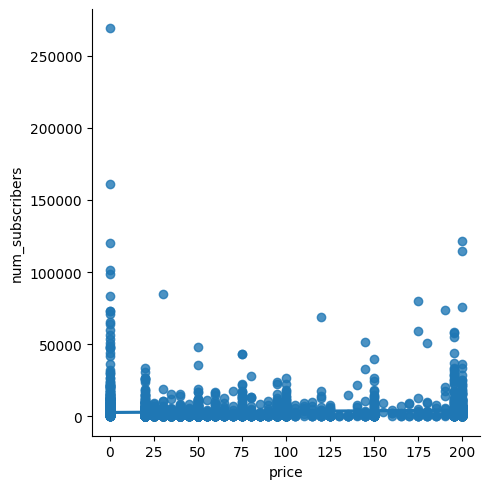

In [58]:
plt.figure(figsize=(16,12))
sns.lmplot(x='price',y='num_subscribers',data=df4_udemy)

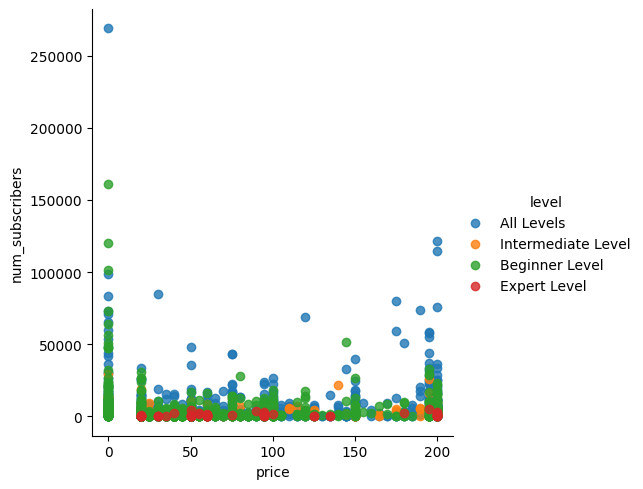

In [59]:
sns.lmplot(x='price',y='num_subscribers',data=df4_udemy,fit_reg=False,hue='level')

Countplot

<AxesSubplot: xlabel='level', ylabel='count'>

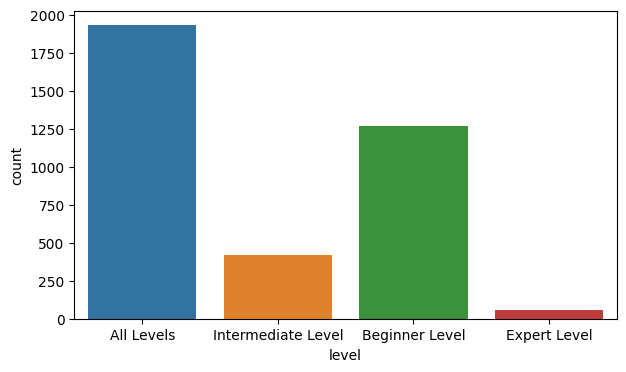

In [60]:
fig_dims = (7,4)
fig,ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='level',data = df4_udemy,ax=ax)

<AxesSubplot: >

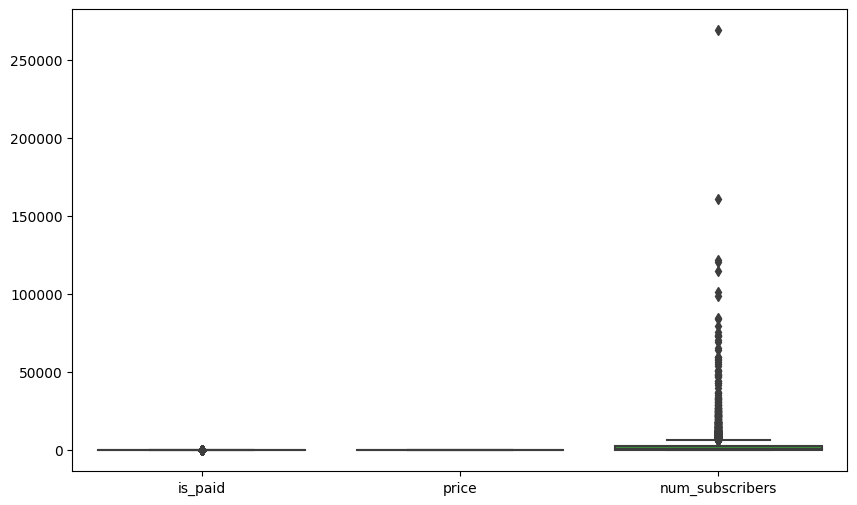

In [61]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df4_udemy)

Pie chart

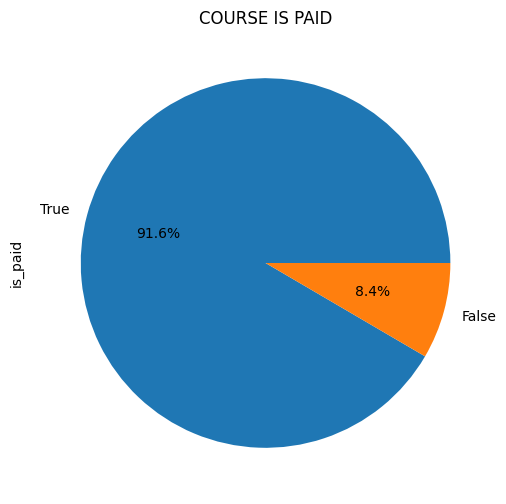

In [62]:
ax= df4_udemy['is_paid'].value_counts(ascending=False).plot.pie(autopct='%1.1f%%',
            figsize=(10, 6))
plt.title('COURSE IS PAID') 
plt.show()

In [63]:
df4_udemy.shape

(3678, 6)

In [64]:
teju = df4_udemy.corr()
teju

/tmp/ipykernel_5721/1427398457.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  teju = df4_udemy.corr()


,is_paid,price,num_subscribers
is_paid,1.000000,0.328513,-0.266159
price,0.328513,1.000000,0.050769
num_subscribers,-0.266159,0.050769,1.000000


<AxesSubplot: >

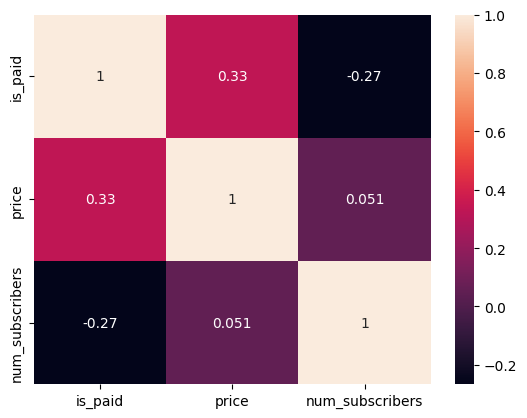

In [65]:
sns.heatmap(teju,annot=True)

Joint plot

<Figure size 1000x600 with 0 Axes>

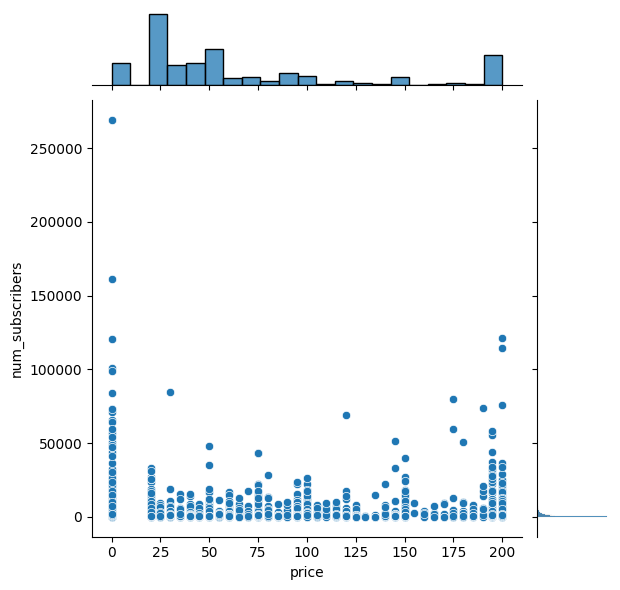

In [66]:
plt.figure(figsize=(10,6))
sns.jointplot(x='price',y='num_subscribers',data=df4_udemy)

Distribution plot

/tmp/ipykernel_5721/2102398354.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4_udemy.price)


<AxesSubplot: xlabel='price', ylabel='Density'>

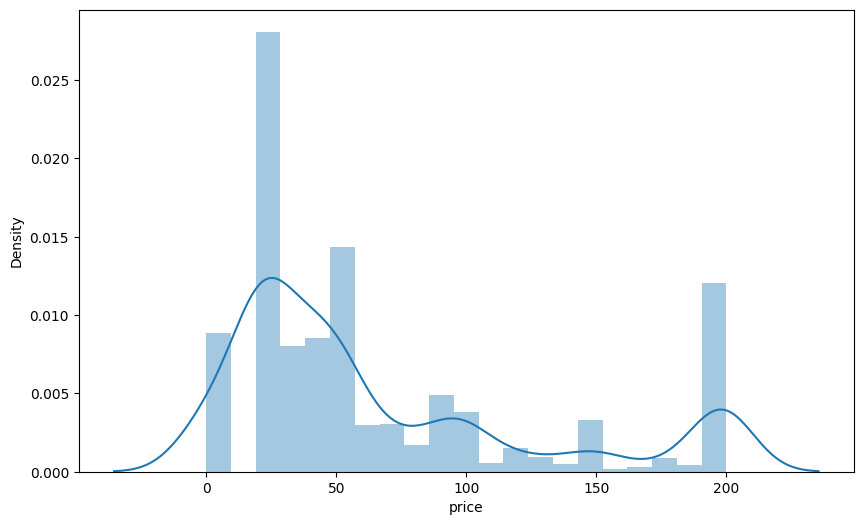

In [67]:
plt.figure(figsize=(10,6))
sns.distplot(df4_udemy.price)